##SENTIMENT ANALYSIS

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
senti_data = pd.read_csv('/content/sample_data/tweet_dataset.csv', encoding='unicode_escape')
senti_data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
senti_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27481 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [ ]:
senti_data.isnull().sum()

textID              0
text                1
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [ ]:
inputt = senti_data['selected_text']
outputt = senti_data['sentiment']

In [ ]:
input_train, input_test, output_train, output_test = train_test_split(
    inputt, outputt, train_size=0.75, random_state=42
)

In [ ]:
print(inputt.shape)
print()
print(input_train.shape)
print()
print(input_test.shape)

(27481,)

(20610,)

(6871,)


In [ ]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(input_train, output_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
sentiment_pred = model.predict(input_test)
sentiment_pred

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype='<U8')

In [ ]:
print(classification_report(sentiment_pred, output_test))

              precision    recall  f1-score   support

    negative       0.58      0.92      0.71      1225
     neutral       0.96      0.68      0.80      3947
    positive       0.74      0.92      0.82      1699

    accuracy                           0.78      6871
   macro avg       0.76      0.84      0.78      6871
weighted avg       0.84      0.78      0.79      6871



In [ ]:
print(confusion_matrix(sentiment_pred, output_test))

[[1130   44   51]
 [ 758 2683  506]
 [  69   60 1570]]


In [ ]:
pd.DataFrame(confusion_matrix(sentiment_pred, output_test),
                   columns=['pred negative', 'pred neutral', 'pred positive'],
                   index=['actual negative', 'actual neutral', 'actual positive'])

,pred negative,pred neutral,pred positive
actual negative,1130,44,51
actual neutral,758,2683,506
actual positive,69,60,1570


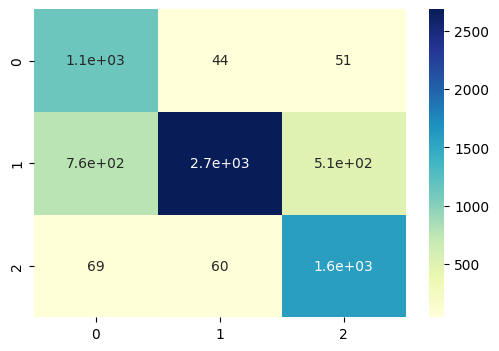

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(sentiment_pred, output_test), annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
def pred_senti(txt, modell):
  predict = modell.predict([txt])
  return predict

In [ ]:
pred_senti("I love you", model)

array(['positive'], dtype='<U8')

In [ ]:
sentences = int(input("Enter how many: "))
for i in range(sentences):
  print(pred_senti(input("Give: "), model))

Enter how many: 3
Give: What the fuck you idiot
['neutral']
Give: I hate you
['negative']
Give: I love you
['positive']


In [ ]:
pred_senti(input(), model)

worst feeling


array(['negative'], dtype='<U8')